# AirBnb Capstone - Part 3 Progress Report

## Rating by Review Counts
The Number of reviews:

Berlin Listings: 18037
Reviews: 427683


Some of the data will be removed due to errors/null values, and processing of the different languages with Vader sentiment analysis is not possible, so some of the non-english reviews are only able to be used for TFiDF and count vectorization. This still feels like enough data to model (at this stage)

The EDA was taken on a sample of 30000 of the reviews, and thier corresponding listings to enable adequate processing time. Once initial models have been developed I intend to look at the entire data set, and perhaps use Spark/Hadoop/AWS to model ont he full data set.

I have classified the language of each reveiw so that I only perform vader analysis of the english reviews.

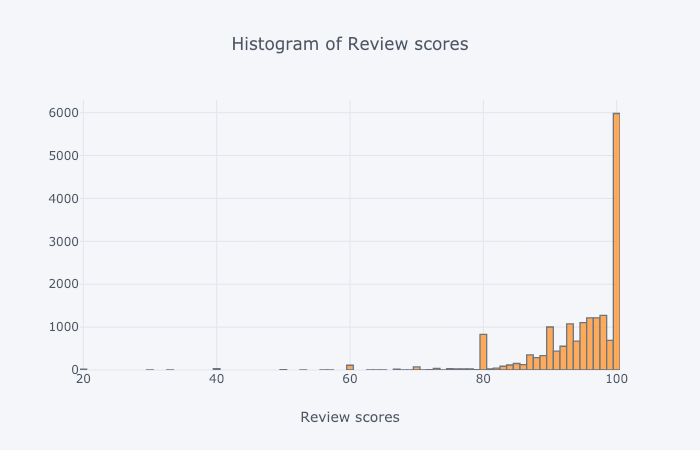
We can see that for the review scores are very highly skewed towards 100/100, and very few low reviews given.

These high review ratings will make it very difficult to distinguish between a good review and a bad review as most listings have a score between 80/100 to 100/100.

It feels strange to me that by far and away most people either want to leave a good review, or would prefer not to leave a bad review.

I'm beginning to suspect that these star ratings are not all they are cracked up to be.

My initial suspicion is that there is some sort of survivorship bias occurring here, Airbnb listings that garner a large proportion of low scoring reviews will be removed by either Airbnb or the host, and possibly reposted. 

I have also processed the individual reviews using vader sentiment analysis. The sentiment analysis also showed that reviewers tend to leave more positive reviews. 
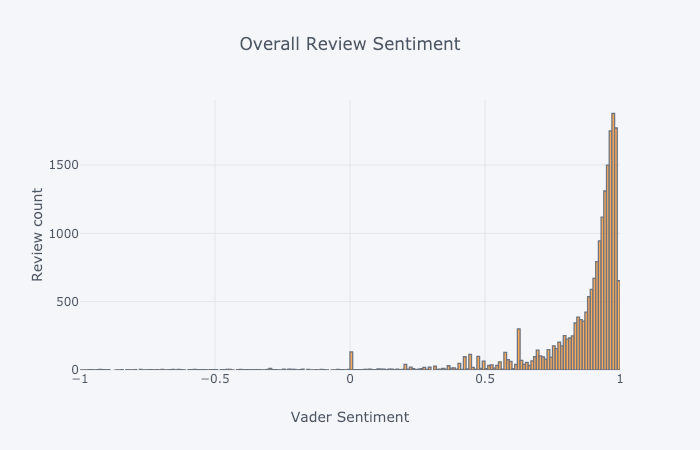
There is very little negitive sentiment in any of the reviews at all. The mean of the review sentiment does not vary much with increasing occupancy rate, however the variance of the sentiment does decrease as the occupancy rate increases. 
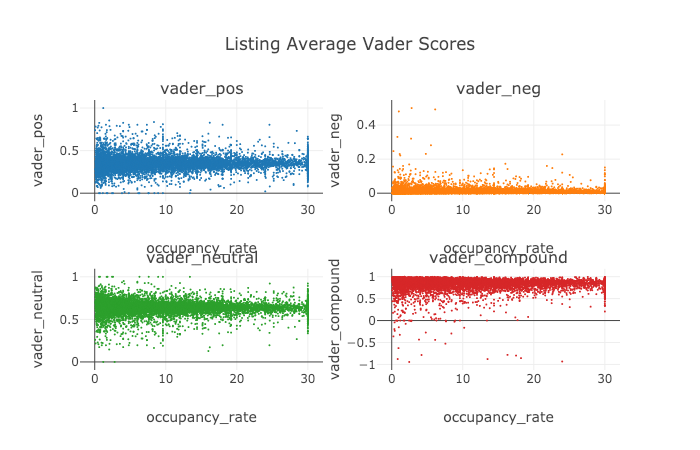

I then wanted to look at the average length of a review left in comparison to the vader sentiment, I would expect that when the emotion for a product is very positive that a review would be longer because the customer would want to tell everyone else how good the Airbnb really was. I would also expect that the other negative sentiment would also lead to a longer review whilst customers vented about bad service or dirty properties.

## Vader sentiment by review length
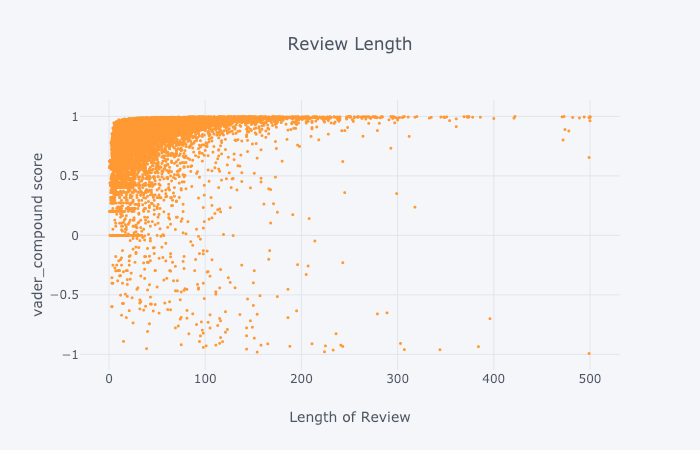
Looking at the scatter plots of review sentiment vs review length, it is appears that my hypothesis is generally corect, the longer reviews tend to be either very positive, or very negative, with no nuetral long reviews, there begins to be some difference accross reviews beginning to emerge.

## Regression of Occupancy Rate
I began by trying to regress the occupancy rate using the tf-idf vectorized reviews, sentiment analysis and the other listing information. Linear regression gave a very negative R2 score, which is not useful. for simplicity and time I dropped the TF-idf information and focused only on the review sentiment and listing information. With Ridge regression an r2 score of 0.22 was achieved. This is a good starting point, but I feel I can do better.

## Classification of Occupancy Rate
I decided to classify the occupancy rate as high/medium/low using a 30% split to start with. I will review this and perhaps look at the distribution of the data and use the quartiles to split the occupancy rate.

Having begun fitting several different models on the review sentiment and listing data, it is possible to classify occupancy rate, but the best gradient boosted model look to be producing accuracies at around 69% using hold out data cross validation (against a 53% baseline).


with a tf-idf vectorizer and logistic regression, an example classification report:

Test score:  0.6929061784897025

    Predicted  high   low  medium   All
    Actual                             
    high        243   255      93   591
    low         114  1020      32  1166
    medium      104    73     251   428
    All         461  1348     376  2185

              precision    recall  f1-score   support

        high       0.53      0.41      0.46       591
         low       0.76      0.87      0.81      1166
      medium       0.67      0.59      0.62       428

    weighted avg   0.68      0.69      0.68      2185

Below I plot the ROC for the classifier, at a roughly 80% True Positive Rate, I am only predicting 20% False Positives for the low occupancy and 25% for the medium occupancy, however high occupancy is only predicted at around 50%.

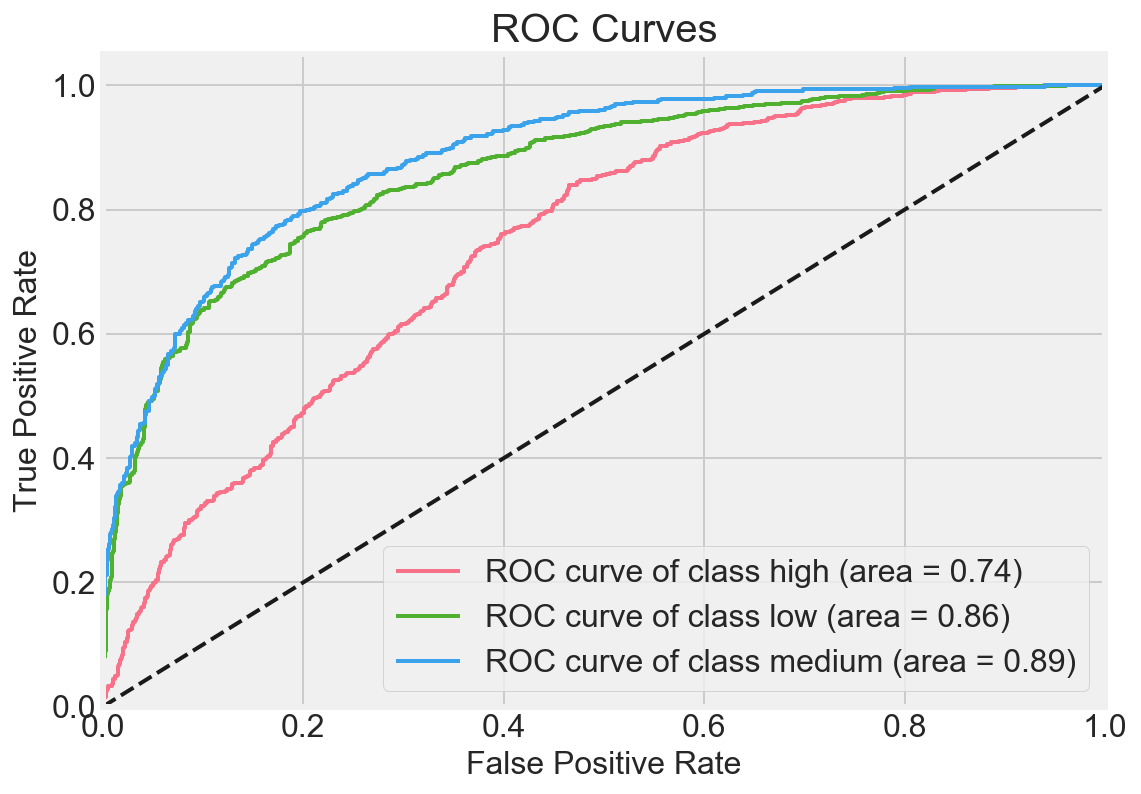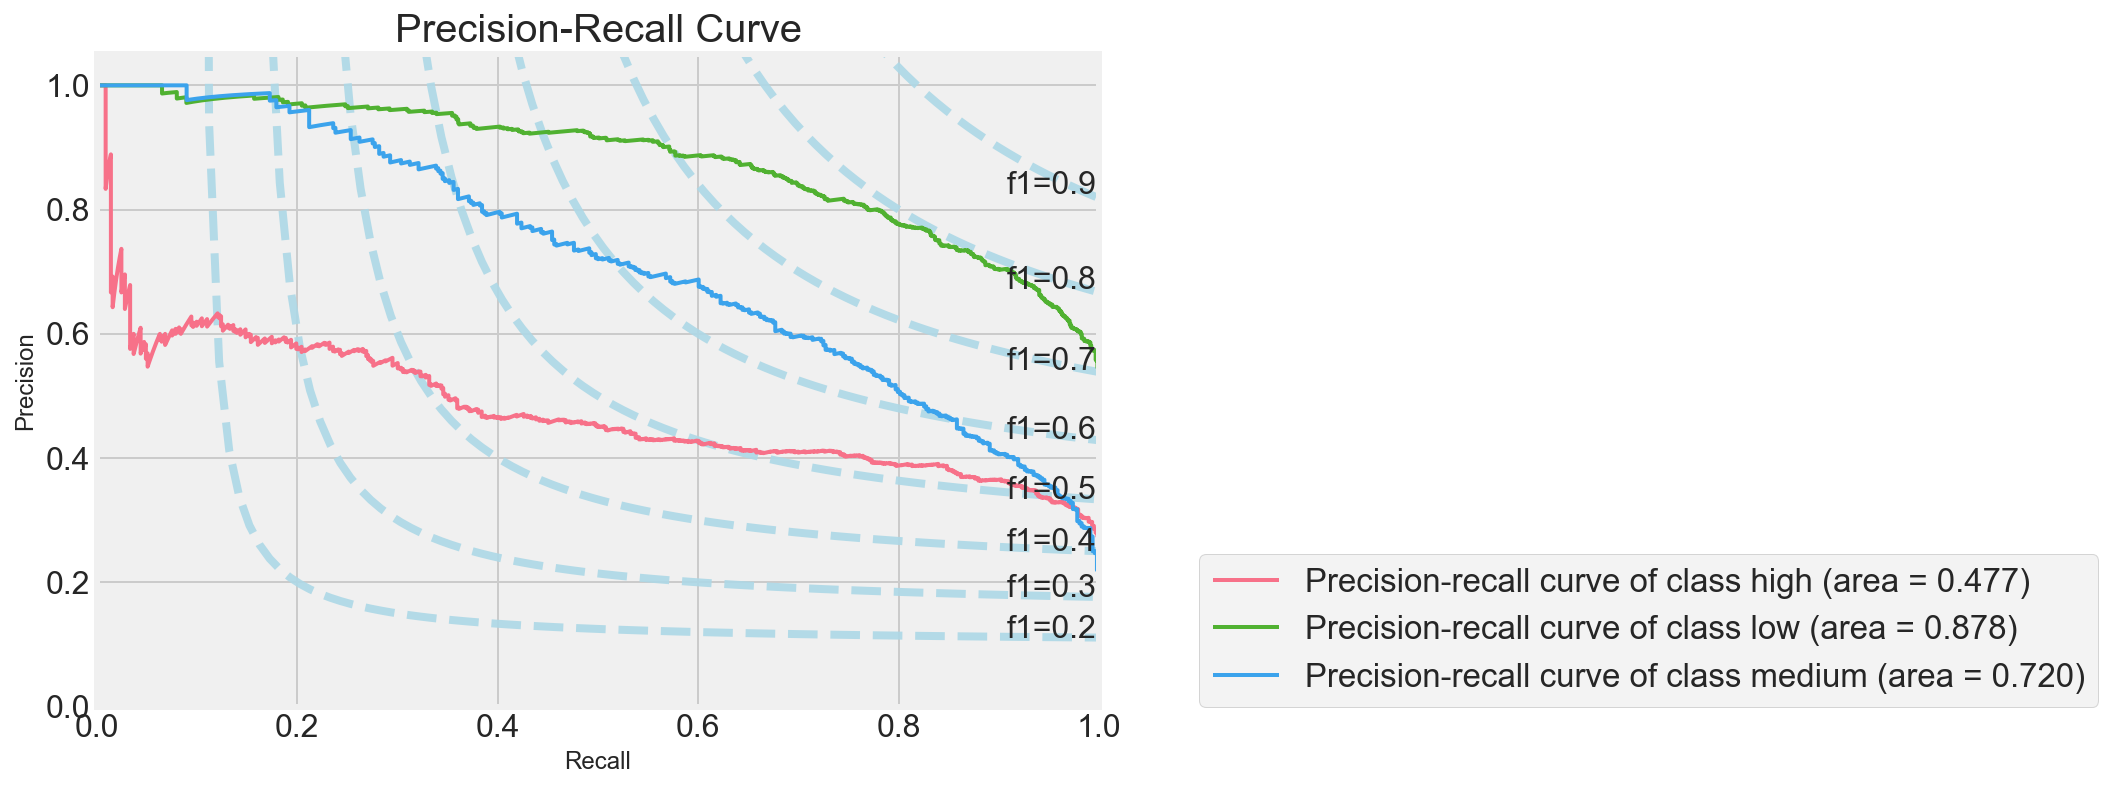

## Next Steps
My next steps are:

* Further improve the models and see if I can incorparate count vectorization into the predictive model.

* Refine the occupancy classification using the quartile ranges rather than a simple 30/30/40 split. I will also refine the occupancy rate for the regression models so that it is infinate rather than an absolute 30 day cutoff as is currently set.

* Test the model on larger samples of the data. As more reveiws/listings are used the modeling time increases. I need to have everything running smothly with a small data set so I can set and forget overnight on the larger data sets.

* **LDA/Topic modelling**
    I wish to investigate fitting an LDA (Latent Dirichlet Allocation) model on all the reviews, to establish if it is possible to predict topic of any particularly positive or negative reviews, my thoughts being that if I can detirmine what makes an Airbnb particularly good or bad then the hosts can improve thier properties in a more targeted way, even before listing the property on the site. eg, are nice bathrooms particularly important, or is it better to have consistant hot-water or a better location.